# Bike Trippin

For this assignment, you will be taking "Cycle Share" data from Seattle and creating charts to determine which gender borrows and uses bikes more often.

* Import your dependencies and then import your data into a pandas data frame from the CSV within the 'Data' folder
* Split up your data into groups based upon the gender column
    * NOTE: There will be a garbage row with a gender of 'stoptime' which you will have to remove!
* Chart your data using a bar graph, giving it both a title and labels for the axes

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
csv_file = "../Resources/trip.csv"
df = pd.read_csv(csv_file, low_memory=False)

df.head()

,stoptime,bikeid,tripduration,from_station_name,to_station_name,from_station_id,to_station_id,usertype,gender,birthyear
0,10/13/2014 10:48,SEA00298,985.935,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Member,Male,1960
1,10/13/2014 10:48,SEA00195,926.375,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Member,Male,1970
2,10/13/2014 10:48,SEA00486,883.831,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Member,Female,1988
3,10/13/2014 10:48,SEA00333,865.937,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Member,Female,1977
4,10/13/2014 10:49,SEA00202,923.923,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Member,Male,1971


In [14]:
gender_group = df.groupby(["gender"])

gender_counts = gender_group["gender"].count()

gender_counts = gender_counts.drop(gender_counts.index[3])

gender_counts

gender
Female     37562
Male      140564
Other       3431
Name: gender, dtype: int64

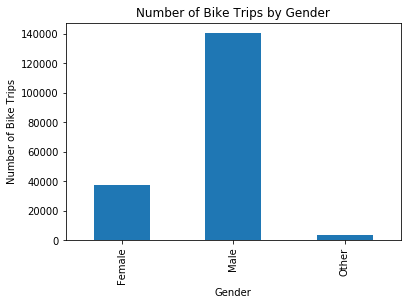

<Figure size 432x288 with 0 Axes>

In [20]:
chart = gender_counts.plot(kind='bar')

# Set the xlabel and ylabel using class methods
chart.set_xlabel("Gender")
chart.set_ylabel("Number of Bike Trips")
chart.set_title("Number of Bike Trips by Gender")

plt.show()
plt.tight_layout()

# Bonus!

You will now take the same base data frame before and create some code that will allow you to create individual pie charts for each bike. For this part of the activity, we want you to chart the total 'Trip Duration' of each bike, sorted by gender. Bonus points if you can come up with a method to do this without using loc or iloc to filter the original data frame! You can use loc to filter group data though.

In [30]:
df.head()

df_trip_duration = df[["bikeid", "tripduration", "gender"]]

df_trip_group = df_trip_duration.groupby(["bikeid", "gender"])

df_trip_group_counts = df_trip_group.sum()

df_trip_group_counts.head(12)

tripduration
bikeid   gender              
SEA00001 Female     15876.665
         Male       41150.373
         Other        276.880
SEA00005 Female     20616.240
         Male       60386.328
         Other       1784.955
SEA00006 Female     20071.004
         Male       46584.453
         Other       1469.839
SEA00007 Female      9996.402
         Male       16618.213
         Other       1040.571

In [31]:
single_bike = df_trip_group_counts.loc["SEA00001"]

print(single_bike)

gender_list = single_bike.keys()

print(gender_list)

        tripduration
gender              
Female     15876.665
Male       41150.373
Other        276.880
Index(['tripduration'], dtype='object')


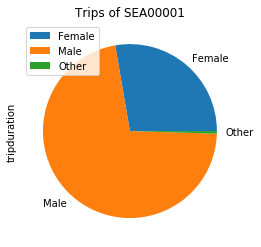

<Figure size 432x288 with 0 Axes>

In [33]:
chart = single_bike.plot(kind='pie', y=gender_list, title="Trips of SEA00001")

plt.show()
plt.tight_layout()